## Imports

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import re
#import ipdb; #ipdb.set_trace()

## Data paths

In [47]:
data_paths = {
    'pichu': "data/pichu.txt",
    'pikachu': "data/pikachu.txt",
    'test_points': "data/test_points.txt"
}

pichu_data = data_paths['pichu']
pikachu_data = data_paths['pikachu']
test_points_data = data_paths['test_points']

## Read and format data

In [48]:
# Source for read-write-files-python: https://realpython.com/read-write-files-python/
# Read and format the data from pichu.txt and pikachu.txt files.
def read_and_format_data(filename):
        try:
            with open(filename, 'r') as file:
                next(file) # Skip header 
                lines = [re.sub(r'[()\s]', '', line) for line in file] # Lecture notes and LLM
                points = [tuple(map(float, line.split(','))) for line in lines] # Lecture notes and LLM
            return points
        except Exception as e:
            print("An error occurred while reading the data from file:", e)

# Read and format the data from the test_points.txt file for classification algorithm's accuracy
def read_and_format_test_points(filename):
    try:
        formatted_points = []
        with open(filename, 'r') as file:
            for line in file:
                pairs = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', line) # Lecture notes and LLM
                formatted_points.extend([(float(pairs[i]), float(pairs[i+1])) for i in range(0, len(pairs), 2)]) # Lecture notes and LLM
        return formatted_points
    except Exception as e:
         print("An error occurred while reading the data from file:", e)

# Usage of read_and_format_data
pichu_points = read_and_format_data(pichu_data)
pikachu_points = read_and_format_data(pikachu_data)
print("Formatted Pitchu points:", pichu_points, # Print the formatted pichu and pikachu points
      "\nFormatted Pikachu points:", pikachu_points)

# Usage of read_and_format_test_points
test_points = read_and_format_test_points(test_points_data)
print("\nFormatted test_points:", test_points) # Print the formatted test_points

Formatted Pitchu points: [(20.11541438766307, 28.701809671168824), (15.200086041781336, 27.095070307714877), (17.200234546952956, 27.669778220491132), (16.785685905190583, 34.36654587712494), (20.8917697133121, 31.480353852465935), (20.41359589938329, 31.091310056669883), (22.137436541638763, 26.71138648198097), (15.695510661035328, 32.291267979503495), (18.375374557482164, 26.634024937619284), (15.238377755504562, 28.794554417576478), (16.749103798428827, 34.895233506365955), (19.042842304826898, 31.399997598540928), (15.212287757470909, 30.569497437746463), (16.59070120549319, 31.846142509898748), (20.199075502236184, 33.4285192018981), (19.35953184482573, 32.75999911546245), (16.763524976325574, 27.290480719641042), (19.71412547100727, 25.321002439040377), (21.475443653422612, 28.154530480590818), (15.051990077424488, 27.67740875975703), (21.446554014662464, 27.109828435863264), (20.585115159905815, 34.429097143350546), (17.722004132143937, 33.76367626472669), (16.24383599849425, 28

## Plotting for Pichu and Pikachu

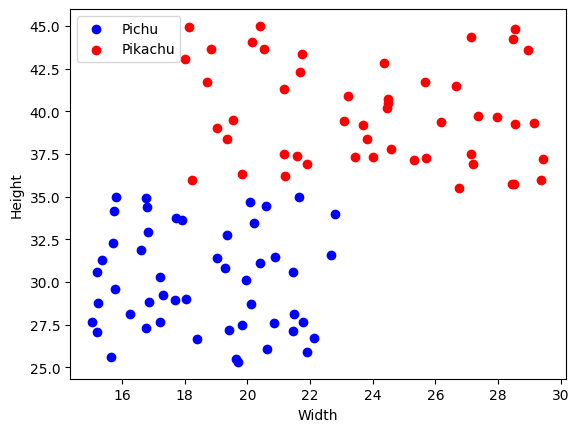

In [49]:
# Plot points on a graph to visually represent pichu and pikachu data points
# Arguments:
#   - pichu_points: A list of (x, y) tuples representing pichu data points
#   - pikachu_points: A list of (x, y) tuples representing pikachu data points
def plot_points(pichu_points, pikachu_points):
    pichu_x, pichu_y = zip(*pichu_points)
    pikachu_x, pikachu_y = zip(*pikachu_points)
    plt.scatter(pichu_x, pichu_y, color='blue', label='Pichu')
    plt.scatter(pikachu_x, pikachu_y, color='red', label='Pikachu')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend()
    plt.show()

# Usage of plot_points for pichu and pikachu points
plot_points(pichu_points, pikachu_points)


## Classification of test points

In [50]:
def classify_test_point(test_point, pichu_points, pikachu_points):

    # Calculate distances to all Pichu and Pikachu points using 'Euclidean distance' formula
    pichu_distances = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in pichu_points] #Euclidean distance formula from: LLM
    pikachu_distances = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in pikachu_points] 
    
    # Find the minimum distance for pichu and pikachu
    min_pichu_distance = min(pichu_distances)
    min_pikachu_distance = min(pikachu_distances)
    
    # Check which of pichu and pikachu the nearest point belongs to
    if min_pichu_distance < min_pikachu_distance:
        return "Pichu"
    else:
        return "Pikachu"

classifications = []
for test_point in test_points:
    classification = classify_test_point(test_point, pichu_points, pikachu_points)
    classifications.append(classification)

# Output results
for i, test_point in enumerate(test_points):
    print(f"Sample with (width, height): {test_point} classified as {classifications[i]}")

Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pichu
Sample with (width, height): (22.0, 45.0) classified as Pikachu


## User inputs a test point

In [51]:
def user_input_test_points():
    while True:
        try:
            user_test_points = []
            
            input_str = input("Enter width and height sepearated by space: ")
            width, height = map(float,input_str.split()) # Convert each element in the list to a float, and then split by spaces to create a list with two elements

            if width < 0 and height < 0: # Continue if both width and height are negative; otherwise, proceed
                print("Error: Width and height must be positive numbers.")
                continue
            user_test_points.append((width, height))
            return user_test_points
        except ValueError: 
            print("Error: Please enter numeric values for width and height.") # Handle non numeric inputs

# Usage of user_test_points
user_test_points = user_input_test_points()
print("User test points entered are:", user_test_points)

Error: Please enter numeric values for width and height.
User test points entered are: [(15.0, 30.0)]


## Classification of user inputted test point

In [52]:
def classify_points(user_test_points, pichu_points, pikachu_points):

    # Calculate distances to all Pichu and Pikachu points using 'Euclidean distance' formula
    pichu_distances = [np.sqrt((user_test_points[0] - p[0])**2 + (user_test_points[1] - p[1])**2) for p in pichu_points] #Euclidean distance formula from: LLM
    pikachu_distances = [np.sqrt((user_test_points[0] - p[0])**2 + (user_test_points[1] - p[1])**2) for p in pikachu_points] 

    # Find the minimum distance for pichu and pikachu
    min_pichu_distance = min(pichu_distances)
    min_pikachu_distance = min(pikachu_distances)
    
    # Check which of pichu and pikachu the nearest point belongs to
    if min_pichu_distance < min_pikachu_distance:
        return "Pichu"
    else:
        return "Pikachu"

# Classify user input test points
user_test_classifications = []
for user_test_point in user_test_points:
    classification = classify_points(user_test_point, pichu_points, pikachu_points)
    user_test_classifications.append(classification)

# Output results for input of user test points
for i, user_test_point in enumerate(user_test_points):
    print(f"User input test point with (width, height): {user_test_point} classified as {user_test_classifications[i]}")

User input test point with (width, height): (15.0, 30.0) classified as Pichu


## Plotting for Pichu, Pikachu and user inputted test point

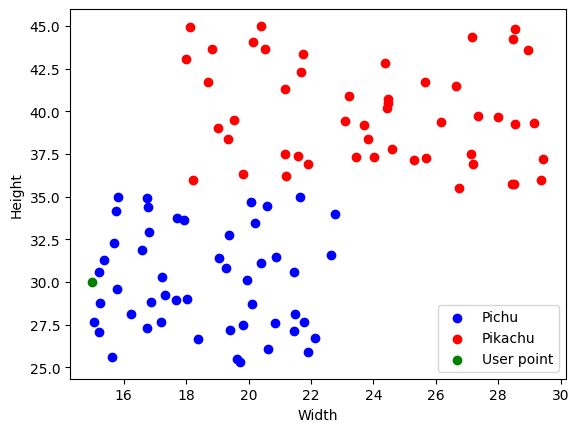

In [53]:
# Plot points on a graph to visually represent pichu, pikachu and user test data points
# Arguments:
#   - pichu_points: A list of (x, y) tuples representing pichu data points
#   - pikachu_points: A list of (x, y) tuples representing pikachu data points
#   - user_test_points: A list of (x, y) tuples representing the data input by the user

def plot_points(pichu_points, pikachu_points, user_test_points):
    pichu_x, pichu_y = zip(*pichu_points)
    pikachu_x, pikachu_y = zip(*pikachu_points)
    usertp_x, usertp_y = zip(*user_test_points)
    plt.scatter(pichu_x, pichu_y, color='blue', label='Pichu')
    plt.scatter(pikachu_x, pikachu_y, color='red', label='Pikachu')
    plt.scatter(usertp_x, usertp_y, color='green', label='User point')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend()
    plt.show()

# Usage of plot_points for pichu, pikachu and user test points
plot_points(pichu_points, pikachu_points, user_test_points)


## Classification of user inputted test points with improved accuracy

In [54]:
# Classify the data of user_test_points by choosing the five closest points to each user test point
def classify_points(user_test_points, pichu_points, pikachu_points):
    # Calculate distances to all Pichu and Pikachu points using 'Euclidean distance' formula
    pichu_distances = [np.sqrt((user_test_points[0] - p[0])**2 + (user_test_points[1] - p[1])**2) for p in pichu_points] #Euclidean distance formula from: LLM
    pikachu_distances = [np.sqrt((user_test_points[0] - p[0])**2 + (user_test_points[1] - p[1])**2) for p in pikachu_points] 
    
    # Sort distances and get the positions of the five closest points
    closest_pichu_indices = np.argsort(pichu_distances)[:5] # https://numpy.org/doc/stable/reference/generated/numpy.argsort.html and LLM
    closest_pikachu_indices = np.argsort(pikachu_distances)[:5]

    # Determine the majority class among the five closest points
    pichu_count = sum(1 for i in closest_pichu_indices if pichu_distances[i] < pikachu_distances[closest_pikachu_indices[0]]) # LLM
    pikachu_count = sum(1 for i in closest_pikachu_indices if pikachu_distances[i] < pichu_distances[closest_pichu_indices[0]])

    
    # Check which of pichu and pikachu the nearest point belongs to
    if pichu_count > pikachu_count:
        return "Pichu"
    else:
        return "Pikachu"

# Classify user input test points
user_test_classifications = []
for user_test_point in user_test_points:
    classification = classify_points(user_test_point, pichu_points, pikachu_points)
    user_test_classifications.append(classification)

# Output results for input of user test points
for i, user_test_point in enumerate(user_test_points):
    print(f"User input test point with (width, height): {user_test_point} classified as {user_test_classifications[i]}")

User input test point with (width, height): (15.0, 30.0) classified as Pichu


## Plotting for Pichu, Pikachu and user inputted test point  

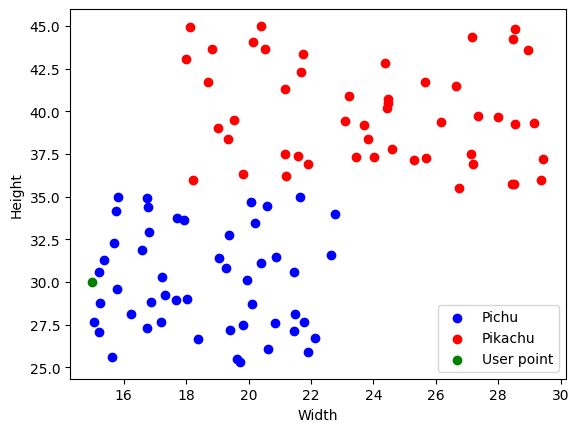

In [55]:
# Usage of plot_points for pichu, pikachu and user test points
plot_points(pichu_points, pikachu_points, user_test_points)